In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import KerasClassifier
from art.utils import load_mnist

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
import tensorflow.keras as keras
from art.utils import load_dataset

from art.defences.preprocessor import LabelSmoothing


In [2]:
(x_train, y_train), (x_test, y_test), min_, max_ = load_dataset(str("mnist"))

In [3]:
x_train = x_train.reshape((60000,28, 28, 1))
x_train = x_train.astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1))
x_test = x_test.astype('float32') / 255

print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
#from keras.utils import to_categorical
#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

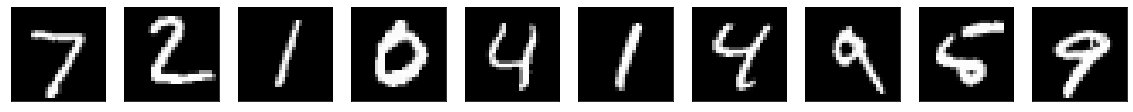

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    ax = plt.subplot(2, n, i +1 )
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [15]:
conv = Sequential()
conv.add(Conv2D(16, kernel_size=(3, 3), activation="relu", input_shape=(28,28,1)))
conv.add(MaxPooling2D(pool_size=(2, 2)))
conv.add(Conv2D(32, (3, 3), activation="relu"))
conv.add(MaxPooling2D(pool_size=(2, 2)))
conv.add(Conv2D(32, (3, 3), activation="relu"))
conv.add(Dropout(0.25))
conv.add(Flatten())
conv.add(Dense(32, activation="relu"))
conv.add(Dropout(0.5))
conv.add(Dense(10, activation="softmax"))

In [16]:
conv.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
tf.compat.v1.disable_eager_execution()

In [18]:
classifier = KerasClassifier(model=conv, clip_values=(min_, max_))
classifier.fit(x_train, y_train, nb_epochs=5, batch_size=128,validation_data=(x_test, y_test))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
466/468 [============================>.] - ETA: 0s - batch: 232.5000 - size: 128.0000 - loss: 0.2943 - accuracy: 0.9047WARNING:tensorflow:From D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
468/468 [==============================] - 7s 16ms/step - batch: 233.5000 - size: 128.0000 - loss: 0.2939 - accuracy: 0.9048 - val_loss: 0.1425 - val_accuracy: 0.9468
Epoch 2/5
468/468 [==============================] - 7s 16ms/step - batch: 233.5000 - size: 128.0000 - loss: 0.1599 - accuracy: 0.9381 - val_loss: 0.0815 - val_accuracy: 0.9731
Epoch 3/5
468/468 [==============================] - 8s 16ms/step - batch: 233.5000 - size

In [18]:
conv.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
dropout_4 (Dropout)          (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 288)              

In [19]:
preds = np.argmax(conv.predict(x_test), axis=1)
acc = np.sum(preds == np.argmax(y_test, axis=1)) / y_test.shape[0]
print("\nTest accuracy: %.2f%%" % (acc * 100))


Test accuracy: 92.43%


In [20]:
epsilon = 0.001  
adv_crafter = FastGradientMethod(classifier, eps=epsilon)
x_train_adv = adv_crafter.generate(x=x_train)
x_test_adv = adv_crafter.generate(x=x_test)

In [21]:
# Evaluate the classifier on the adversarial examples
preds = np.argmax(classifier.predict(x_test_adv), axis=1)
acc = np.sum(preds == np.argmax(y_test, axis=1)) / y_test.shape[0]
print("\nTest accuracy on adversarial example: %.2f%%" % (acc * 100))


Test accuracy on adversarial example: 10.53%


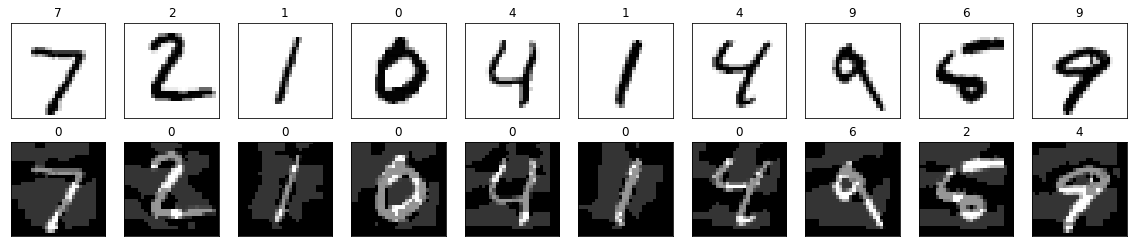

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
predictions = classifier.predict(x_test)
prediction = classifier.predict(x_test_adv)
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.title(np.argmax(np.round(predictions[i])))
    plt.imshow(x_test[i].reshape(28, 28), cmap = plt.cm.binary)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

    bx = plt.subplot(2, n, i + n + 1)
    plt.title(np.argmax(np.round(prediction[i])))
    plt.imshow(x_test_adv[i].reshape(28, 28), cmap = plt.cm.binary)
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

In [45]:
(xc_train, yc_train), (xc_test, yc_test) = mnist.load_data()

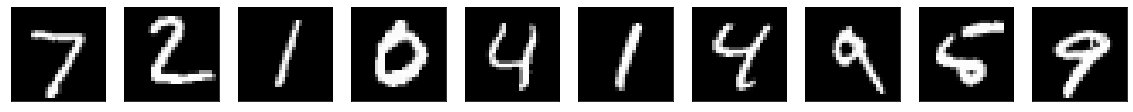

In [78]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(xc_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [47]:
xc_train = xc_train.astype('float32') / 255.
xc_test = xc_test.astype('float32') / 255.

xc_train = xc_train[..., tf.newaxis]
xc_test = xc_test[..., tf.newaxis]

print(xc_train.shape)
print(xc_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [48]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()


In [49]:
autoencoder.compile(optimizer='adam',loss=losses.MeanSquaredError(),metrics=["accuracy",tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [50]:
his=autoencoder.fit(x_train_adv,xc_train,
                epochs=7,
                shuffle=True,
                validation_data=(x_test_adv,xc_test),
               )


Train on 60000 samples, validate on 10000 samples
Epoch 1/7
60000/60000 [==============================] - 48s 801us/sample - loss: 0.0355 - accuracy: 0.8093 - precision_6: 0.9591 - recall_6: 0.5204 - val_loss: 0.0148 - val_accuracy: 0.8123 - val_precision_6: 0.9871 - val_recall_6: 0.6568
Epoch 2/7
60000/60000 [==============================] - 50s 831us/sample - loss: 0.0113 - accuracy: 0.8139 - precision_6: 0.9905 - recall_6: 0.6730 - val_loss: 0.0088 - val_accuracy: 0.8134 - val_precision_6: 0.9934 - val_recall_6: 0.7032
Epoch 3/7
60000/60000 [==============================] - 49s 821us/sample - loss: 0.0079 - accuracy: 0.8147 - precision_6: 0.9957 - recall_6: 0.6851 - val_loss: 0.0066 - val_accuracy: 0.8140 - val_precision_6: 0.9973 - val_recall_6: 0.6962
Epoch 4/7
60000/60000 [==============================] - 49s 822us/sample - loss: 0.0062 - accuracy: 0.8151 - precision_6: 0.9978 - recall_6: 0.6883 - val_loss: 0.0061 - val_accuracy: 0.8140 - val_precision_6: 0.9967 - val_recall_

In [51]:
autoencoder.summary()

Model: "denoise_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_13 (Sequential)   (None, 7, 7, 16)          4944      
_________________________________________________________________
sequential_14 (Sequential)   multiple                  7249      
Total params: 12,193
Trainable params: 12,193
Non-trainable params: 0
_________________________________________________________________


In [ ]:
plt.plot(his.history['precision'], label='precision')
plt.plot(his.history['recall'], label='recall')
plt.plot(his.history['accuracy'], label='accuracy')
#plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.ylim([0.15, 1.1])
plt.legend(loc='upper right')

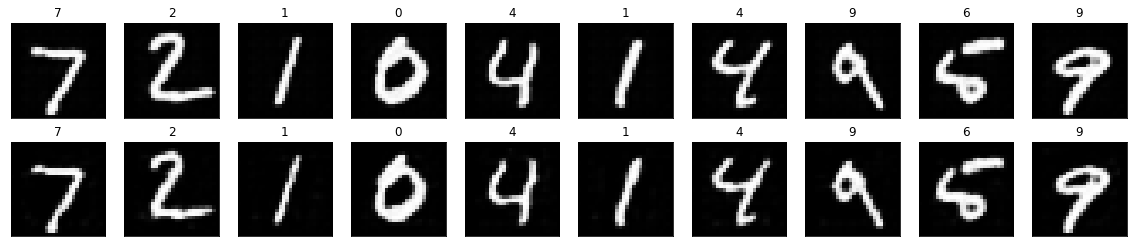

In [74]:
n = 10
plt.figure(figsize=(20, 4))
prediction_1 = autoencoder.predict(x_test)
prediction_2 = autoencoder.predict(x_test_adv)
pred_1 = conv.predict(x_test)
pred_2 = conv.predict(prediction_2)

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.title(np.argmax(np.round(pred_1[i])))
    
    plt.imshow(prediction_1[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    bx = plt.subplot(2, n, i + n + 1)
    plt.title(np.argmax(np.round(pred_2[i])))
    plt.imshow(prediction_2[i])
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
    
plt.show()

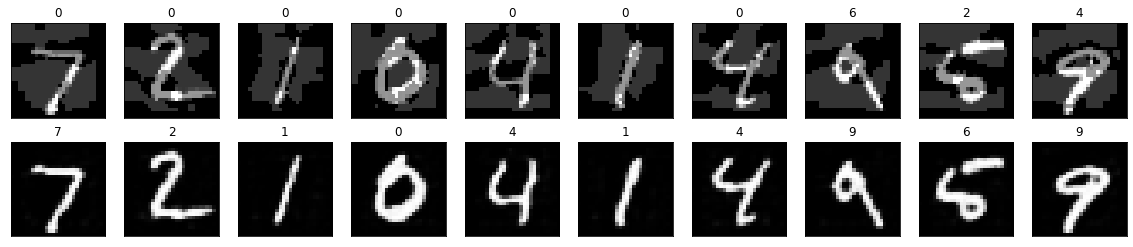

In [76]:
import matplotlib as mpl
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
prediction_2 = autoencoder.predict(x_test_adv)
prediction = classifier.predict(x_test_adv)

for i in range(n):
    ax = plt.subplot(2, n, i  + 1)
    plt.title(np.argmax(np.round(prediction[i])))
    plt.imshow(x_test_adv[i].reshape(28, 28), cmap = plt.cm.binary)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    bx = plt.subplot(2, n, i + n + 1)
    plt.title(np.argmax(np.round(pred_2[i])))
    plt.imshow(prediction_2[i])
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

In [ ]:
tf.keras.utils.plot_model(conv, show_shapes=True, rankdir="LR")

In [ ]:
tf.keras.utils.plot_model(autoencoder, show_shapes=True, rankdir="TB")

In [ ]:
tf.keras.utils.plot_model(decoder, show_shapes=True, rankdir="TB")